<a href="https://colab.research.google.com/github/Applied-Machine-Learning-2022/final-project-trd-s-ua/blob/rp-base-project/gesture_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Our Process

- View past colabs and see which are relevant to the Capstone
-  Find an online repository of hand gestures to utilize and save us the time of gathering data
- Take a video and process it, showing that the gestures are recognized


**EVERYTHING BEYOND THIS POINT IS -*IF WE CAN GET TO IT*-**

- Take live video feed using opencv's VideoCapture
- Execute different local processes based off the live video feed

In [ ]:
import numpy as np # We'll be storing our data as numpy arrays
import os # For handling directories
from PIL import Image # For handling the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # Plotting
from keras import layers
from keras import models
from random import randint
import keras
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import cv2 as cv
import tensorflow as tf
import urllib.request
import os
import tarfile
import shutil

In [ ]:
lookup = dict()
reverselookup = dict()
count = 0
for j in os.listdir('/content/drive/MyDrive/leapGestRecog/00'):
    if not j.startswith('.'): # If running this code locally, this is to 
                              # ensure you aren't reading in hidden folders
        lookup[j] = count
        reverselookup[count] = j
        count = count + 1
lookup

{'01_palm': 9,
 '02_l': 8,
 '03_fist': 3,
 '04_fist_moved': 6,
 '05_thumb': 0,
 '06_index': 7,
 '07_ok': 4,
 '08_palm_moved': 2,
 '09_c': 1,
 '10_down': 5}

In [ ]:
x_data = []
y_data = []
datacount = 0 # We'll use this to tally how many images are in our dataset
for i in range(0, 7): # Loop over the ten top-level folders
    for j in os.listdir('/content/drive/MyDrive/leapGestRecog/0' + str(i) + '/'):
        if not j.startswith('.'): # Again avoid hidden folders
            count = 0 # To tally images of a given gesture
            for k in os.listdir('/content/drive/MyDrive/leapGestRecog/0' + 
                                str(i) + '/' + j + '/'):
                                # Loop over the images
                img = Image.open('/content/drive/MyDrive/leapGestRecog/0' + 
                                 str(i) + '/' + j + '/' + k).convert('L')
                                # Read in and convert to greyscale
                img = img.resize((320, 120))
                arr = np.array(img)
                x_data.append(arr) 
                count += 1
            y_values = np.full((count, 1), lookup[j]) 
            y_data.append(y_values)
            datacount = datacount + count
x_data = np.array(x_data, dtype = 'float32')
y_data = np.array(y_data)
y_data = y_data.reshape(datacount, 1) # Reshape to be the correct size

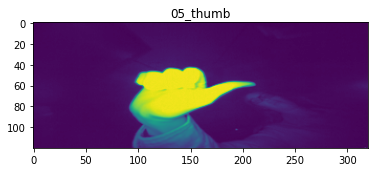

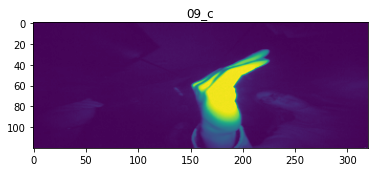

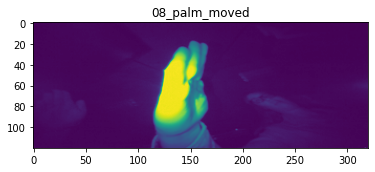

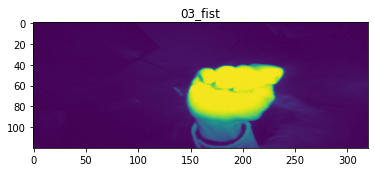

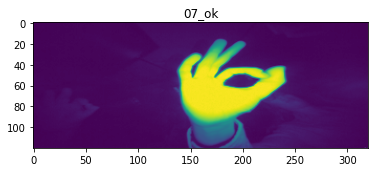

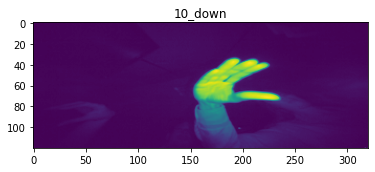

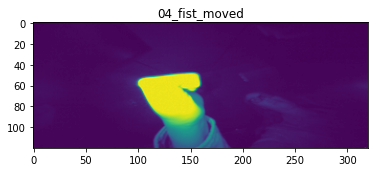

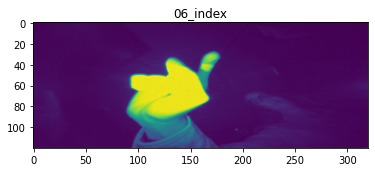

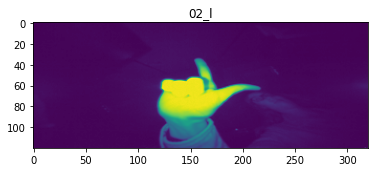

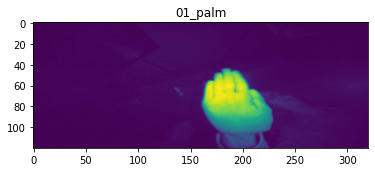

In [ ]:
for i in range(0, 10):
    plt.imshow(x_data[i*200 , :, :])
    plt.title(reverselookup[y_data[i*200 ,0]])
    plt.show()


In [ ]:
y_data = to_categorical(y_data)

In [ ]:
x_data = x_data.reshape((datacount, 120, 320, 1))
x_data /= 255

In [ ]:
x_train,x_further,y_train,y_further = train_test_split(x_data,y_data,test_size = 0.2)
x_validate,x_test,y_validate,y_test = train_test_split(x_further,y_further,test_size = 0.5)

In [ ]:
model=models.Sequential()
model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(120, 320,1))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1, validation_data=(x_validate, y_validate))

Epoch 1/10
175/175 [==============================] - 6s 28ms/step - loss: 0.3311 - accuracy: 0.8938 - val_loss: 0.0405 - val_accuracy: 0.9829
Epoch 2/10
175/175 [==============================] - 4s 25ms/step - loss: 0.0169 - accuracy: 0.9956 - val_loss: 0.0079 - val_accuracy: 0.9979
Epoch 3/10
175/175 [==============================] - 4s 25ms/step - loss: 0.0101 - accuracy: 0.9979 - val_loss: 0.0031 - val_accuracy: 0.9993
Epoch 4/10
175/175 [==============================] - 4s 25ms/step - loss: 0.0039 - accuracy: 0.9990 - val_loss: 0.0019 - val_accuracy: 0.9993
Epoch 5/10
175/175 [==============================] - 4s 25ms/step - loss: 0.0045 - accuracy: 0.9991 - val_loss: 0.0012 - val_accuracy: 0.9993
Epoch 6/10
175/175 [==============================] - 4s 25ms/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 7.4560e-04 - val_accuracy: 0.9993
Epoch 7/10
175/175 [==============================] - 4s 25ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 1.2809e-04 - val_accuracy

In [ ]:
[loss, acc] = model.evaluate(x_test,y_test,verbose=1)
print("Accuracy:" + str(acc))

44/44 [==============================] - 0s 8ms/step - loss: 0.2931 - accuracy: 0.9486
Accuracy:0.9485714435577393


In [ ]:
# Read in video file and get info over the video

input_video = cv.VideoCapture('hands.mp4')

height = int(input_video.get(cv.CAP_PROP_FRAME_HEIGHT))
width = int(input_video.get(cv.CAP_PROP_FRAME_WIDTH))
fps = input_video.get(cv.CAP_PROP_FPS)
total_frames = int(input_video.get(cv.CAP_PROP_FRAME_COUNT))

In [ ]:
graph_def = tf.compat.v1.GraphDef()

outputs = (
    # Delete below comment later
  # 'image_tensor:0',
  'num_detections:0',
  'detection_classes:0',
  'detection_scores:0',
  'detection_boxes:0',
)

def wrap_graph(graph_def, inputs, outputs, print_graph=False):
  wrapped = tf.compat.v1.wrap_function(
    lambda: tf.compat.v1.import_graph_def(graph_def, name=""), [])

  return wrapped.prune(
    tf.nest.map_structure(wrapped.graph.as_graph_element, inputs),
    tf.nest.map_structure(wrapped.graph.as_graph_element, outputs))

In [ ]:
fourcc = cv.VideoWriter_fourcc(*'mp4v')
output_video = cv.VideoWriter('gesture-detection.mp4', fourcc, fps, (width, height))

for i in range(0, int(fps), 15):

  input_video.set(cv.CAP_PROP_POS_FRAMES, i)
  ret, frame = input_video.read()

  tensor = tf.convert_to_tensor([frame], dtype=tf.uint8)
  model = wrap_graph(graph_def=graph_def,
                   inputs=["image_tensor:0"],
                   outputs=outputs)
  detections = model(tensor)

  r = 0
  g = 255
  b = 0
  scale = 0.75
  thickness = 2

  for i, box in enumerate(detections[3][0]):
    if detections[1][0][i] == 3:
      cv.rectangle(frame, (width*box[1], height*box[0]), (width*box[3], height*box[2]), (0, 0, 255), 2)
      cv.putText(frame, "Car", (width*box[1], height*box[0]), cv.FONT_HERSHEY_SIMPLEX, scale, [r, g, b], thickness)

  if not ret:
    raise Exception("Problem reading frame", i, " from video")
  output_video.write(frame)

input_video.release()
output_video.release()

KeyError: ignored